In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# simple data

In [2]:
# true data

N = 100
X = np.linspace(-np.pi, np.pi, N).reshape(N, 1) # 100 x 1
real_y = np.sin(X)

#  add noise
y = real_y + 0.1*np.random.randn(N, 1)

idx = np.random.permutation(N)
X_ = X[idx]
y_ = y[idx]

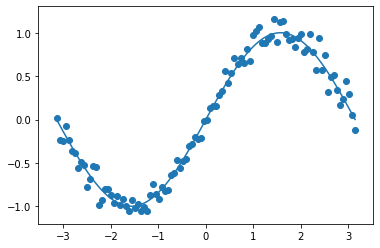

In [3]:
# show

plt.figure()
plt.plot(X, real_y)
plt.scatter(X, y)
plt.show()

In [4]:
n = N - 20

# train data
X_train = X_[:n]
y_train = y_[:n]
X_test = X_[n:]
y_test = y_[n:]

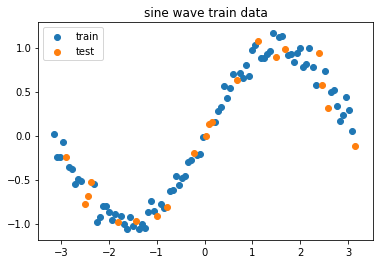

In [5]:
#plot
plt.figure()
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.title('sine wave train data')
plt.show()


## Hyper parameter setting

In [6]:
learning_rate = 1e-1
training_epochs = 1000

In [8]:
tf.reset_default_graph()

# place holder

tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

# variables

w1 = tf.get_variable('w1', [1, 1])
b1 = tf.get_variable('b1', [1])
w2 = tf.get_variable('w2', [1, 1])
b2 = tf.get_variable('b2', [1])

# model

output1 = tf_X @ w1 + b1
hidden1 = tf.nn.sigmoid(output1)
y_pred = hidden1 @ w2 + b2

# loss and optimizer

loss = tf.reduce_mean(tf.reduce_sum(tf.pow(tf_y - y_pred, 2), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(1e-1).minimize(loss)


W0820 16:08:06.798583 139800368277248 deprecation.py:506] From /home/pirl/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0820 16:08:06.861800 139800368277248 deprecation.py:323] From /home/pirl/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
with tf.Session() as sess:
    # init
    sess.run(tf.global_variables_initializer())
    
    # train
    for i in range (training_epochs):
        sess.run(optimizer, feed_dict = {tf_X: X_train, tf_y:y_train})
        
    y_train_pred = sess.run(y_pred, feed_dict = {tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict = {tf_X:X_test})

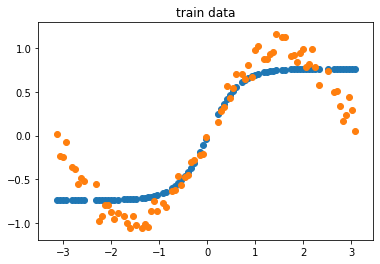

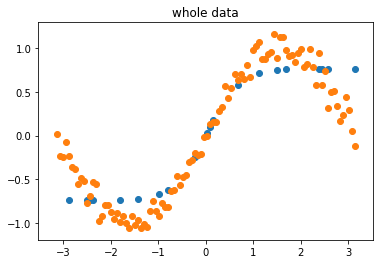

In [13]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='predict')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')

plt.title('whole data')
plt.show()

# dense 이용

In [18]:
tf.reset_default_graph()

# place holder

tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

# model

hidden1 = tf.layers.dense(tf_X, 1, activation = tf.nn.sigmoid)
y_pred = tf.layers.dense(hidden1, 1)

# loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(1e-1).minimize(loss)
with tf.Session() as sess:
    # init
    sess.run(tf.global_variables_initializer())
    
    # train
    for i in range (training_epochs):
        sess.run(optimizer, feed_dict = {tf_X: X_train, tf_y:y_train})
        
    y_train_pred = sess.run(y_pred, feed_dict = {tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict = {tf_X:X_})

In [23]:
with tf.Session() as sess:
    # init
    sess.run(tf.global_variables_initializer())
    
    # train
    for i in range (training_epochs):
        sess.run(optimizer, feed_dict = {tf_X: X_train, tf_y:y_train})
        
    y_train_pred = sess.run(y_pred, feed_dict = {tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict = {tf_X:X_})

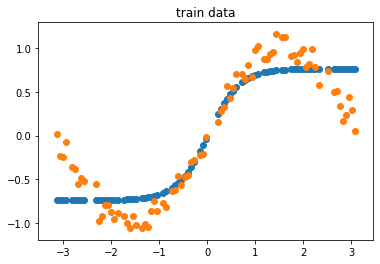

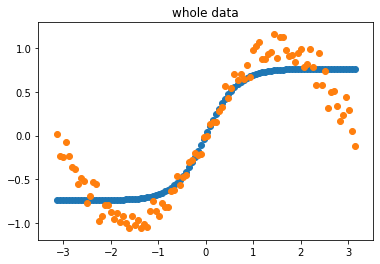

In [24]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='predict')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')

plt.title('whole data')
plt.show()

In [26]:
with tf.Session() as sess:
    # init
    sess.run(tf.global_variables_initializer())
    
    # train
    losses = [] # init loss list
    for i in range (training_epochs):
        _, I = sess.run([optimizer, loss], feed_dict =  {tf_X: X_train, tf_y:y_train})
        losses.append(I)
    y_train_pred = sess.run(y_pred, feed_dict = {tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict = {tf_X:X_})

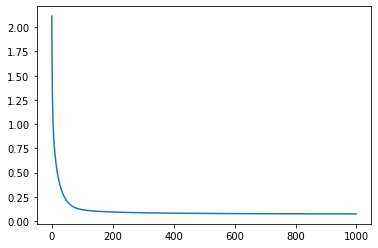

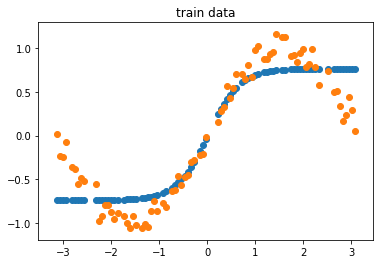

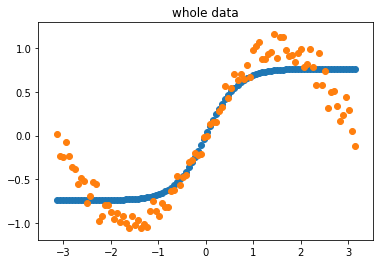

In [29]:
plt.figure()
plt.plot(losses)
plt.show()

plt.figure()
plt.scatter(X_train, y_train_pred, label='predict')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')

plt.title('whole data')
plt.show()

### change hidden layer's...

In [37]:
tf.reset_default_graph()

# place holder

tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

# model

hidden1 = tf.layers.dense(tf_X, 10, activation = tf.nn.sigmoid)
y_pred = tf.layers.dense(hidden1, 1)

# loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    # init
    sess.run(tf.global_variables_initializer())
    
    # train
    losses = [] # init loss list
    for i in range (training_epochs):
        _, I = sess.run([optimizer, loss], feed_dict =  {tf_X: X_train, tf_y:y_train})
        losses.append(I)
        
    y_train_pred = sess.run(y_pred, feed_dict = {tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict = {tf_X:X_})

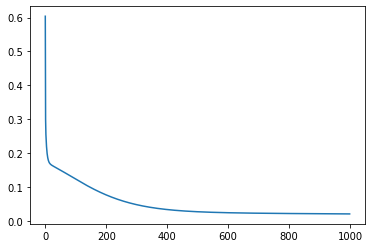

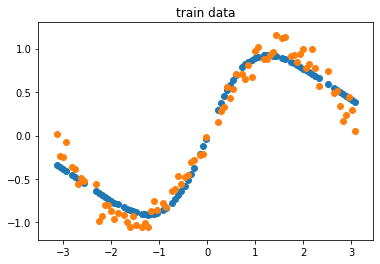

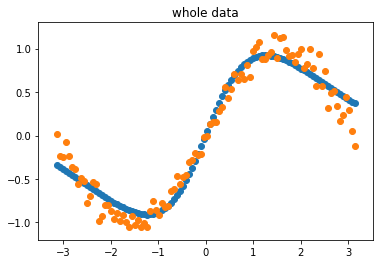

In [38]:
plt.figure()
plt.plot(losses)
plt.show()

plt.figure()
plt.scatter(X_train, y_train_pred, label='predict')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')

plt.title('whole data')
plt.show()


change activation function from sigmoid to tanh

In [39]:
tf.reset_default_graph()

# place holder

tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

# model

hidden1 = tf.layers.dense(tf_X, 10, activation = tf.nn.tanh)
y_pred = tf.layers.dense(hidden1, 1)

# loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    # init
    sess.run(tf.global_variables_initializer())
    
    # train
    losses = [] # init loss list
    for i in range (training_epochs):
        _, I = sess.run([optimizer, loss], feed_dict =  {tf_X: X_train, tf_y:y_train})
        losses.append(I)
        
    y_train_pred = sess.run(y_pred, feed_dict = {tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict = {tf_X:X_})

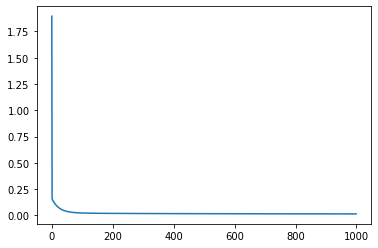

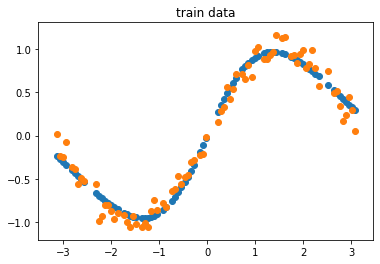

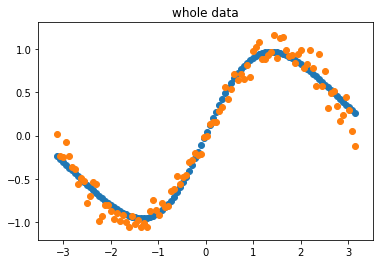

In [40]:
plt.figure()
plt.plot(losses)
plt.show()

plt.figure()
plt.scatter(X_train, y_train_pred, label='predict')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')

plt.title('whole data')
plt.show()


# summary

In [46]:
learning_rate = 1e-1
training_epochs = 1000

h = 10
act = tf.nn.tanh

tf.reset_default_graph()

tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

hidden1 = tf.layers.dense(tf_X, h, activation = act)
y_pred = tf.layers.dense(hidden1, 1)

loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(1e-1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    losses = [] ## init loss
    for i in range (training_epochs):
        ## get loss
        _, l = sess.run([optimizer, loss], feed_dict = {tf_X: X_train, tf_y: y_train})
        losses.append(l)
    
    y_train_pred = sess.run(y_pred, feed_dict = {tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict = {tf_X:X_})

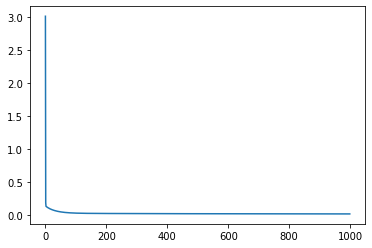

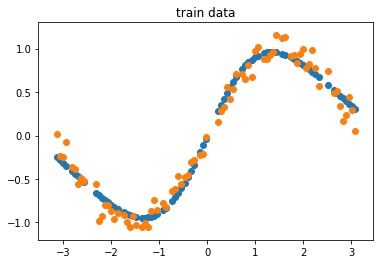

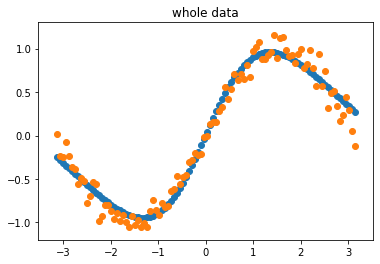

In [47]:
plt.figure()
plt.plot(losses)
plt.show()

plt.figure()
plt.scatter(X_train, y_train_pred, label='predict')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')

plt.title('whole data')
plt.show()
